In [1]:
import os
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from process import *
%matplotlib inline


# Vehicle Detection Project

***The goals / steps of this project are the following:***

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier. Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.
* Note: Don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a   heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

Refer files **utils.py,train.py**.
***Code is adapted from classroom lessons***
#### Step 1: 
* ***Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images. Apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.***

In **utils.py** line no.18, function definition **get_hog_features()** obtains hog features. 
In **train.py** line no.18 , function **features_extract()** extracts hog,bin spatial and color histogram features using function **extract_features()** at line no.57,65 and append all to get feature vector which is used for training SVM classifier. 
In **utils.py** line no.92,is defined for function **extract_features()** 


* ***Train a classifier Linear SVM classifier***

In **train.py** line no.77, function **train()** takes feature vectors as input and trains the classifier.
The **svc_modelfitting.ipynb**, reads images(car and noncar) , calls **features_extract()** to get feature vectors for training the LinearSVC.Then calls **train()** function to model fit and model is saved as pickled file **svc_pickle.p** for easy access latter.


#### Step 2:
* ***Note: Normalize your features and randomize a selection for training and testing***

In **train.py** line no.86 and 92, performs normalization of features and randomize training and testing set selections.



#### Step 3:
* ***Implement a sliding-window technique and use your trained classifier to search for vehicles in images***

In **utils.py** line no.345, function find_cars() takes image as input on which vehicles are to be identified,extracts hog features for entire image at once and using hog sub-sampling to extract features for each window rather than computing hog features for each window which is time consuming. The scale factor taken as input is to alter the search window size. The higher the factor the image is reshaped down by that factor i.e indirectly increase search window size thereby number of windows search is reduced for ROI.To identify cars farther in the image, scale of 1 is used and for cars nearer, a higher scale factor of 1.5 or 2 is used. The subsampled hog features are normalized and used for prediction by classifier. If predicted 1 , the car is found in that window and drawn rectangle box and also the pixels inside the box are added with 1 creating heatmap.

#### Step 4:
* ***Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles***

Refer **process.py** file

Two functions are defined. The function **process_detect()** is for detecting vehicles in a single image and also to return heatmap and labels for plotting purpose. The function **process_track()** is for detecting and tracking vehicles and drawing bounding boxes around vehicles for a video clip. For single image detection, process_track() functionality is same as process_detect(). 
This file has loading of svc model and parameters.The **process_track()** function takes video clip as input.It internally calls **find_cars()** function with multi-scale window sizes, detects windows where it predicts presence of car and for those windows the pixels are added heat by adding 1 to get heatmap.For all multi-scale window sizes the heatmap is calculated and summed up and saved as heatmap_sum. This summed up so that by applying threshold, the less predicted pixels (false positives) are removed given that prominent hot regions are retained.Then final boxes from heatmap is found using **label()** function which provides unique labels for each heatmap isolated regions as detected cars.The labeled image where pixels are set to 0 for background, 1 for car number 1, and 2 for car number 2.

The **draw_labeled_bboxes()** function takes labels image and put bounding boxes around the labeled regions.This is done by identifying x,y positions of each car region, choosing minimum x,y of non-zero pixel positions and maximum of non-zero pixel positions as boundary for bounding boxes and drawn  rectangle for each car region.For first frame, bounding boxes are drawn as explained above and for subsequent frames to make smooth boundary boxes drawing, for every 3(refered as count variable) frames new boundary box is drawn, by caching.






### Vehicle detection of test images

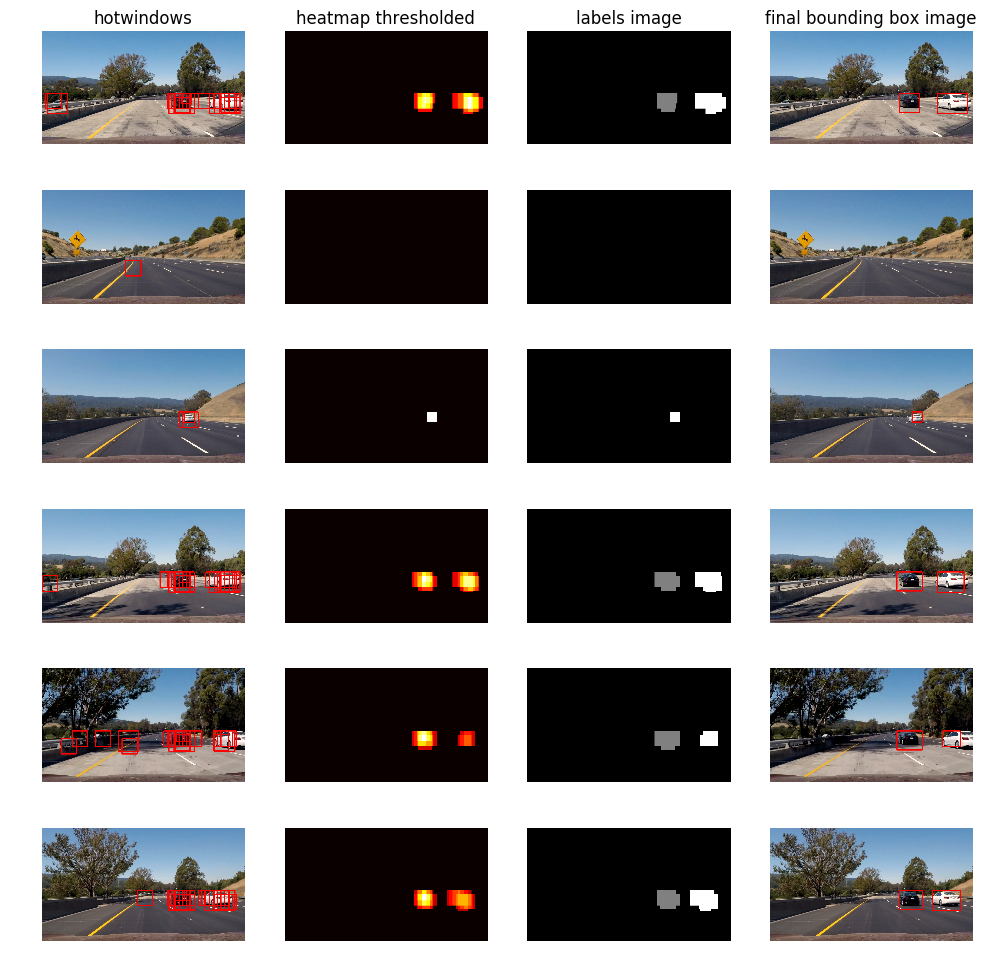

In [2]:
#List all filenames from dir test_images
filenames = os.listdir("test_images/")
fig = plt.figure(figsize=(12,12))

for i,filename in enumerate(filenames):
    
    image = mpimg.imread('test_images/'+filename)
    
    detect_image,heatmap_image,labels_image,windows_image = process_detect(image)
    mpimg.imsave('output_images/detect_'+filename,detect_image)
    plt.subplot(6,4,4*i+1)
    plt.axis('off')
    plt.imshow(windows_image)
    if i==0:
        plt.title('hotwindows')
        
    plt.subplot(6,4,4*i+2)
    plt.axis('off')
    plt.imshow(heatmap_image,cmap='hot')
    if i ==0:
        plt.title('heatmap thresholded')
    
    plt.subplot(6,4,4*i+3)
    plt.axis('off')
    plt.imshow(labels_image[0], cmap='gray')
    if i ==0:
        plt.title('labels image')
    
    plt.subplot(6,4,4*i+4)
    plt.axis('off')
    plt.imshow(detect_image)
    if i ==0:
        plt.title('final bounding box image')


### Vehicle detection and tracking for test video 

In [3]:

init_global()
test_video_output = 'test_video_output.mp4'
clip2 = VideoFileClip('test_video.mp4')

project_video_clip= clip2.fl_image(process_track)
%time project_video_clip.write_videofile(test_video_output, audio=False)

[MoviePy] >>>> Building video test_video_output.mp4
[MoviePy] Writing video test_video_output.mp4


 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [00:31<00:00,  1.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output.mp4 

Wall time: 34 s


### Vehicle detection and tracking for project video 

In [4]:
init_global()

project_video_output = 'project_video_output.mp4'
clip2 = VideoFileClip('project_video.mp4')

project_video_clip = clip2.fl_image(process_track)
%time project_video_clip.write_videofile(project_video_output, audio=False)


[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [17:26<00:00,  1.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 17min 28s


### Vehicle detection and tracking for challenge video 

In [5]:
init_global()
challenge_video_output = 'challenge_video_output.mp4'
clip2 = VideoFileClip('challenge_video.mp4')

challenge_video_clip = clip2.fl_image(process_track)
%time challenge_video_clip.write_videofile(challenge_video_output, audio=False)

[MoviePy] >>>> Building video challenge_video_output.mp4
[MoviePy] Writing video challenge_video_output.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 485/485 [06:43<00:00,  1.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_output.mp4 

Wall time: 6min 45s
